<a href="https://colab.research.google.com/github/eduard-ignatev/high-performance-python/blob/main/00_hw/Julia_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Raw Python Julia

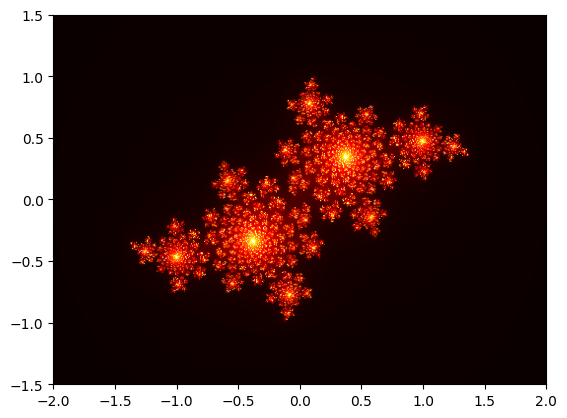

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def julia_fractal(width, height, max_iter):
    x_min, x_max = -2.0, 2.0
    y_min, y_max = -1.5, 1.5
    c = complex(-0.4, 0.6)  # Julia set parameter

    x = np.linspace(x_min, x_max, width)
    y = np.linspace(y_min, y_max, height)

    fractal = np.zeros((height, width))

    for i in range(height):
        for j in range(width):
            z = complex(x[j], y[i])
            n = 0
            while abs(z) < 2 and n < max_iter:
                z = z**2 + c
                n += 1
            fractal[i, j] = n

    return fractal

# Example usage
width, height = 500, 500
max_iter = 255

fractal = julia_fractal(width, height, max_iter)
plt.imshow(fractal, cmap='hot', extent=( -2, 2, -1.5, 1.5))
plt.show()

In [ ]:
%%timeit
julia_fractal(width, height, max_iter)

984 ms ± 239 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
import cProfile

cProfile.run('julia_fractal(width, height, max_iter)')

         3317067 function calls in 1.856 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.489    1.489    1.856    1.856 <ipython-input-1-c167ff5fa810>:4(julia_fractal)
        1    0.000    0.000    1.856    1.856 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:3172(_ndim_dispatcher)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:3176(ndim)
        2    0.000    0.000    0.000    0.000 function_base.py:19(_linspace_dispatcher)
        2    0.000    0.000    0.001    0.001 function_base.py:24(linspace)
        2    0.000    0.000    0.000    0.000 multiarray.py:669(result_type)
        2    0.000    0.000    0.000    0.000 numeric.py:1855(isscalar)
        2    0.000    0.000    0.000    0.000 {built-in method _operator.index}
  3317036    0.366    0.000    0.366    0.000 {built-in method builtins.abs}
        1    0.000    0.000    1.856    1.856 {built-in metho

In [ ]:
!pip install gprof2dot

In [ ]:
!gprof2dot -f pstats stats | dot -Tpng -o output.png

In [ ]:
!pip install line_profiler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.2/750.2 kB 37.4 MB/s eta 0:00:00


In [ ]:
%load_ext line_profiler

In [ ]:
%lprun -f julia_fractal julia_fractal(width, height, max_iter)

## Numba Julia

In [ ]:
from numba import jit

In [ ]:
julia_fractal_numba = jit()(julia_fractal)

In [ ]:
%%timeit
julia_fractal_numba(width, height, max_iter)

48.6 ms ± 903 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
cProfile.run('julia_fractal_numba(width, height, max_iter)')

         5 function calls in 0.078 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.078    0.078    0.078    0.078 <ipython-input-18-c167ff5fa810>:4(julia_fractal)
        1    0.000    0.000    0.078    0.078 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 serialize.py:30(_numba_unpickle)
        1    0.000    0.000    0.078    0.078 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [ ]:
# %lprun -f julia_fractal_numba julia_fractal_numba(width, height, max_iter)
# How to run on a wrapped function?

### Bonus tool

In [ ]:
!pip install pyinstrument

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 11.4 MB/s eta 0:00:00


In [ ]:
%load_ext pyinstrument

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

_     ._   __/__   _ _  _  _ _/_   Recorded: 20:25:50  Samples:  2146
 /_//_/// /_\ / //_// / //_'/ //     Duration: 2.155     CPU time: 2.139
/   _/                      v5.0.1

Cell [36]

2.154 <cell line: 0>  <ipython-input-36-d5b74923dba4>:1
`- 2.154 julia_fractal  <ipython-input-18-c167ff5fa810>:4
   |- 1.696 [self]  <ipython-input-18-c167ff5fa810>
   `- 0.456 abs  <built-in>
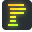

In [ ]:
%%pyinstrument
julia_fractal(width, height, max_iter)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

_     ._   __/__   _ _  _  _ _/_   Recorded: 20:25:58  Samples:  1
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.058     CPU time: 0.058
/   _/                      v5.0.1

Cell [37]

0.057 <cell line: 0>  <ipython-input-37-743ae22eedec>:1
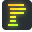

In [ ]:
%%pyinstrument
julia_fractal_numba(width, height, max_iter)